In [1]:
import matplotlib.pyplot as plt
import note_seq
import bokeh
import librosa.display
import numpy as np

from src.features.build_features import detokenize
from src.entities.audio_params import AudioParams
from src.entities.dataset_params import DatasetParams
from src.data.make_dataset import WavMidiDataset

SAMPLE_RATE = 44100
FRAME_LENGTH = 4096
OVERLAPPING = 8

audio_params = AudioParams(
    sample_rate=SAMPLE_RATE,
    frame_length=FRAME_LENGTH,
    n_mels=512,
    fmin=8,
    fmax=12500,
    window="hann"
)
dataset_params = DatasetParams(
    root_path="../data/raw/maestro-v3.0.0/",
    metadata="maestro-v3.0.0.csv",
    years_list=[2014],
    split="train",
    audio_params=audio_params,
    feature_size=3,
    overlapping=OVERLAPPING,
)

dataset = WavMidiDataset(dataset_params)


/home/ilya20/documents/MusicTranscription/.venv/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
frames, notes, times = dataset[0]
midi_filename, _ = dataset._data.iloc[0]
ns = note_seq.midi_file_to_note_sequence(dataset._root_path + midi_filename)

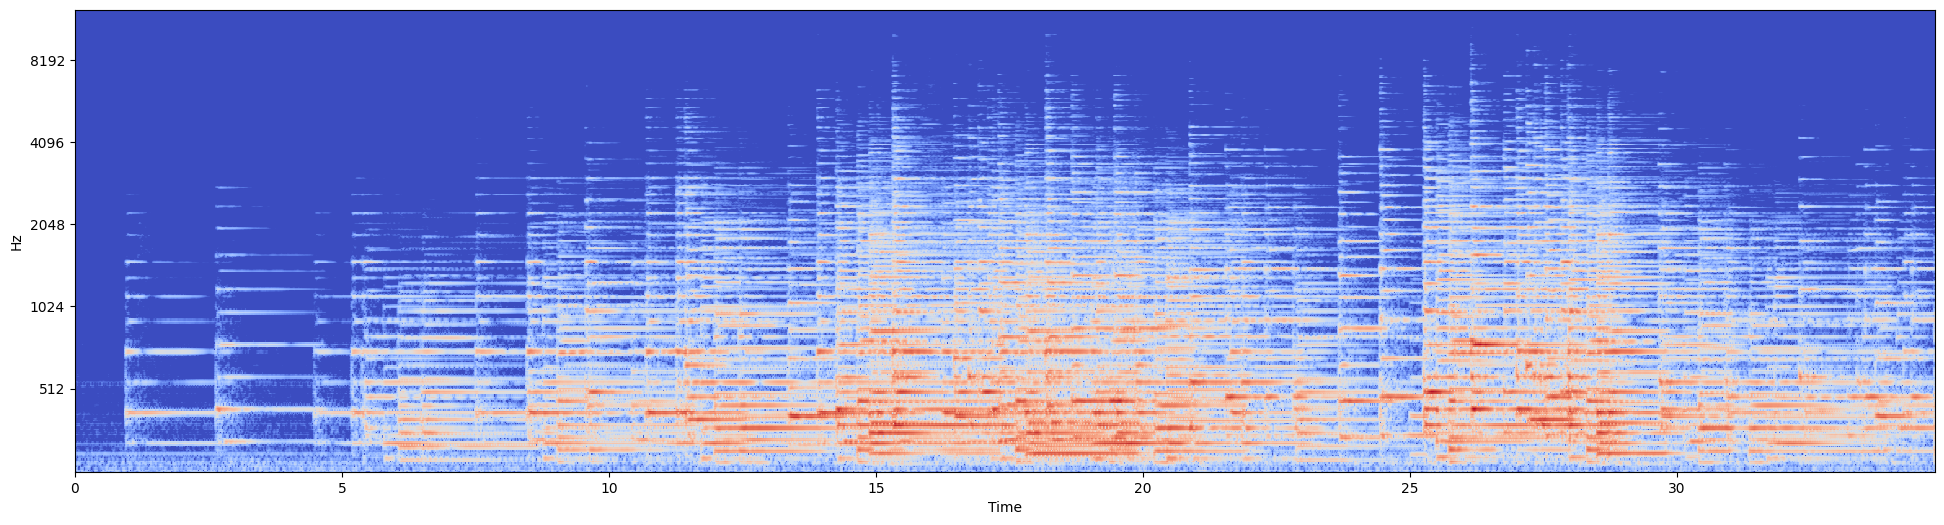

In [7]:
plt.figure(figsize=(24, 6))
librosa.display.specshow(
    np.hstack(frames[:1000]),
    sr=audio_params.sample_rate,
    x_axis='time',
    y_axis='mel',
    fmax=audio_params.fmax,
    fmin=audio_params.fmin,
    hop_length=dataset._hop_length
)